**EDA on Commuting Zones**\
**Name: Kanna Venkata Sai Darsith**\
**Enrollment No: 23115061**\
**Sub Batch: EE3**

In [ ]:
import pandas as pd

df = pd.read_csv(r"/content/data-for-good-at-meta-commuting-zones-march-2023.csv")
df.head()

,region,fbcz_id,name,fbcz_id_num,cz_gen_ds,win_population,win_roads_km,area,country,geography
0,North,North1271,dolbeau,101271,2023-03-05,2.413507e+04,197720.588138,41328.232858,Canada,"POLYGON ((-73.171737 48.196908, -73.836874 48...."
1,Europe,Europe664,palermo,300664,2023-03-05,9.955335e+05,13834.974552,1939.132589,Italy,"MULTIPOLYGON (((12.626358 37.823068, 12.581514..."
2,Africa,Africa206,el-misharrak qibli,500206,2023-03-05,9.396842e+05,108984.287960,17244.529602,Egypt,"POLYGON ((28.444688 28.64421, 29.242836 29.534..."
3,North,North475,anchorage,100475,2023-03-05,6.767075e+05,7555.160360,9108.042058,United States,MULTIPOLYGON (((-147.3797341324976 60.02318520...
4,Africa,Africa558,blantyre,500558,2023-03-05,4.442659e+06,300658.485760,59859.890445,Malawi,"POLYGON ((35.061233 -17.734307, 34.863882 -17...."


Methodology\
Step 1: Assign populations to home and work locations
We assign populations to home and work locations based on information people provide and location services they have opted into (to learn see Location Privacy Basics).\
Step 2: Calculate movement between locations
We aggregate populations’ home and work locations to create a graph that measures movements between places over the previous few weeks.\
Step 3: Identify clusters
We use a community detection algorithm to identify clusters that represent commuting zones, and build our commuting zone shapes by dividing them into areas based on their centers.

In [ ]:
df.shape

(6541, 10)

In [ ]:
df.head()

,region,fbcz_id,name,fbcz_id_num,cz_gen_ds,win_population,win_roads_km,area,country,geography
0,North,North1271,dolbeau,101271,2023-03-05,2.413507e+04,197720.588138,41328.232858,Canada,"POLYGON ((-73.171737 48.196908, -73.836874 48...."
1,Europe,Europe664,palermo,300664,2023-03-05,9.955335e+05,13834.974552,1939.132589,Italy,"MULTIPOLYGON (((12.626358 37.823068, 12.581514..."
2,Africa,Africa206,el-misharrak qibli,500206,2023-03-05,9.396842e+05,108984.287960,17244.529602,Egypt,"POLYGON ((28.444688 28.64421, 29.242836 29.534..."
3,North,North475,anchorage,100475,2023-03-05,6.767075e+05,7555.160360,9108.042058,United States,MULTIPOLYGON (((-147.3797341324976 60.02318520...
4,Africa,Africa558,blantyre,500558,2023-03-05,4.442659e+06,300658.485760,59859.890445,Malawi,"POLYGON ((35.061233 -17.734307, 34.863882 -17...."


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          6541 non-null   object 
 1   fbcz_id         6541 non-null   object 
 2   name            6540 non-null   object 
 3   fbcz_id_num     6541 non-null   int64  
 4   cz_gen_ds       6541 non-null   object 
 5   win_population  6541 non-null   float64
 6   win_roads_km    6539 non-null   float64
 7   area            6541 non-null   float64
 8   country         6541 non-null   object 
 9   geography       6541 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 511.1+ KB
None


In [ ]:
print(df.describe())

         fbcz_id_num  win_population  win_roads_km          area
count    6541.000000    6.541000e+03  6.539000e+03  6.541000e+03
mean   317469.988228    6.722566e+05  1.594596e+05  5.411537e+04
std    162966.162297    1.152781e+06  1.587714e+06  3.152413e+06
min    100242.000000    1.924466e+03  3.773358e+02  1.324123e+00
25%    200264.000000    3.399312e+04  5.945073e+03  1.471939e+03
50%    301482.000000    1.691672e+05  1.789509e+04  4.312860e+03
75%    401043.000000    6.567501e+05  4.854484e+04  1.182933e+04
max    600967.000000    4.442659e+06  6.037039e+07  2.549489e+08


In [ ]:
print(df.nunique())

region               6
fbcz_id           6541
name              6313
fbcz_id_num       6541
cz_gen_ds            1
win_population    5887
win_roads_km      6376
area              6541
country            215
geography         6541
dtype: int64


In [ ]:
print(df.isnull().sum())

region            0
fbcz_id           0
name              1
fbcz_id_num       0
cz_gen_ds         0
win_population    0
win_roads_km      2
area              0
country           0
geography         0
dtype: int64


In [ ]:
df[df.isnull().any(axis=1)]

,region,fbcz_id,name,fbcz_id_num,cz_gen_ds,win_population,win_roads_km,area,country,geography
1717,Asia,Asia1011,dawei,401011,2023-03-05,420376.949140,NaN,51.259226,Myanmar,POLYGON ((98.84701419477369 14.280238331344917...
3022,Asia,Asia717,NaN,400717,2023-03-05,235398.405071,13141.602214,7299.207777,Thailand,"POLYGON ((100.601558 17.991105, 100.45201 18.0..."
5365,Oceania,Oceania167,mongmong,600167,2023-03-05,35985.303526,NaN,168.215869,Guam,"POLYGON ((144.723802 13.246121, 144.719197 13...."


In [ ]:
df = df.dropna()
df.shape

(6538, 10)

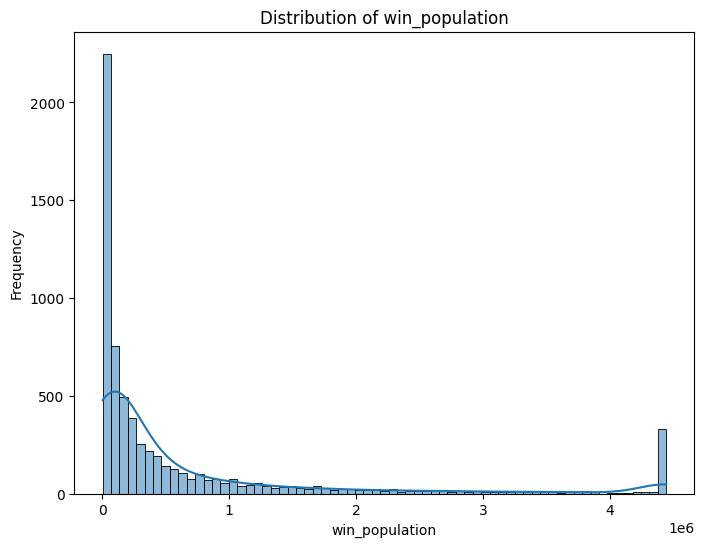

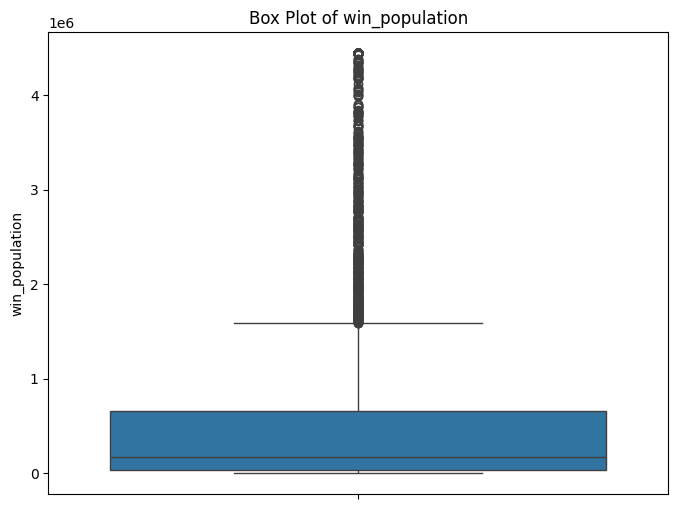

count    6.541000e+03
mean     6.722566e+05
std      1.152781e+06
min      1.924466e+03
25%      3.399312e+04
50%      1.691672e+05
75%      6.567501e+05
max      4.442659e+06
Name: win_population, dtype: float64


In [ ]:
# univariate analysis for win_population

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['win_population'], kde=True)
plt.title('Distribution of win_population')
plt.xlabel('win_population')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['win_population'])
plt.title('Box Plot of win_population')
plt.ylabel('win_population')
plt.show()
print(df['win_population'].describe())


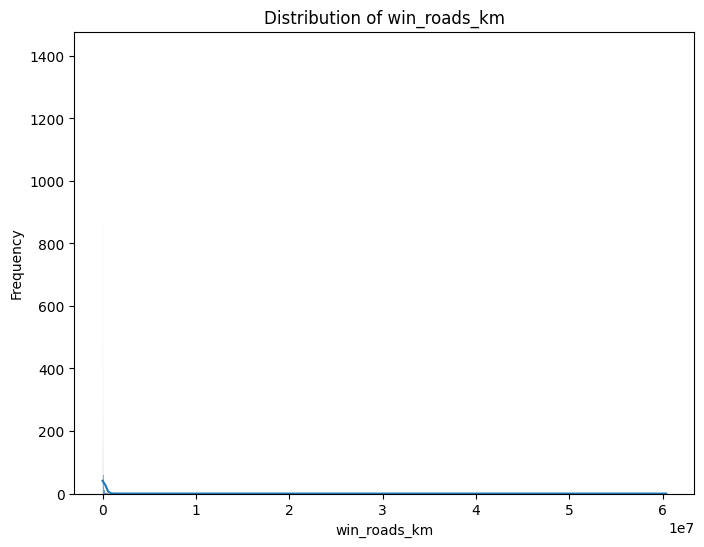

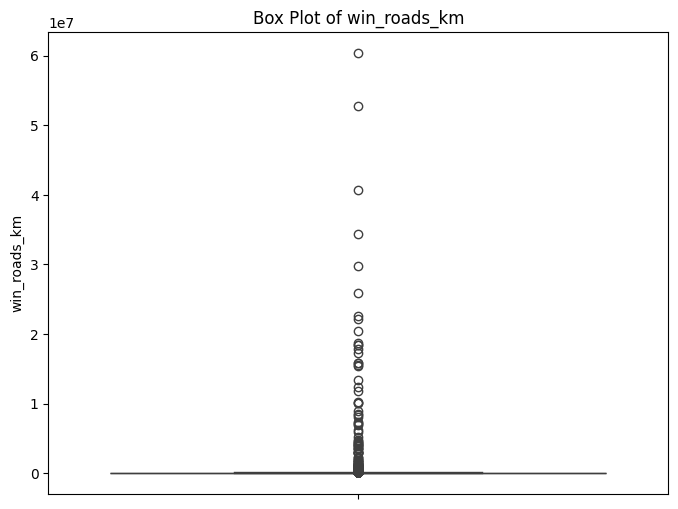

count    6.539000e+03
mean     1.594596e+05
std      1.587714e+06
min      3.773358e+02
25%      5.945073e+03
50%      1.789509e+04
75%      4.854484e+04
max      6.037039e+07
Name: win_roads_km, dtype: float64


In [ ]:
#  univariate analysis for win_roads_km

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(df['win_roads_km'], kde=True)
plt.title('Distribution of win_roads_km')
plt.xlabel('win_roads_km')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['win_roads_km'])
plt.title('Box Plot of win_roads_km')
plt.ylabel('win_roads_km')
plt.show()
print(df['win_roads_km'].describe())


In [ ]:
print(sorted(df['country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands', 'Faroe Islands', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greec

In [16]:
df = pd.read_csv(r"/content/data-for-good-at-meta-commuting-zones-march-2023.csv")

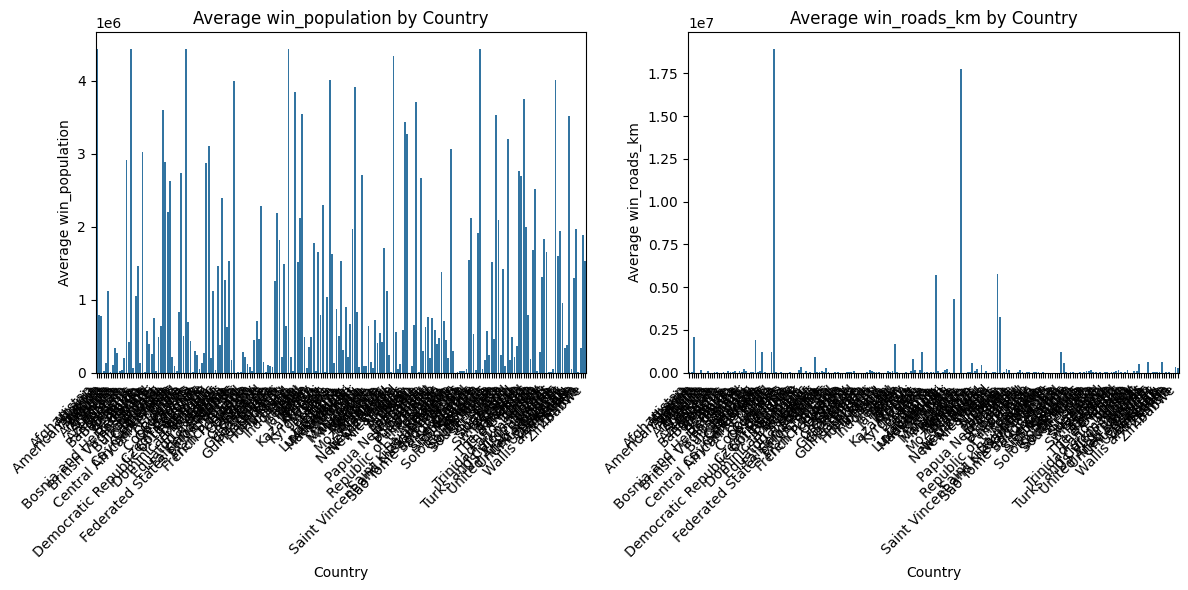

In [17]:
#  country level average win_population and win_roads_km in bar graphs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
country_stats = df.groupby('country').agg({'win_population': 'mean', 'win_roads_km': 'mean'})
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=country_stats.index, y=country_stats['win_population'])
plt.title('Average win_population by Country')
plt.xlabel('Country')
plt.ylabel('Average win_population')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.barplot(x=country_stats.index, y=country_stats['win_roads_km'])
plt.title('Average win_roads_km by Country')
plt.xlabel('Country')
plt.ylabel('Average win_roads_km')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


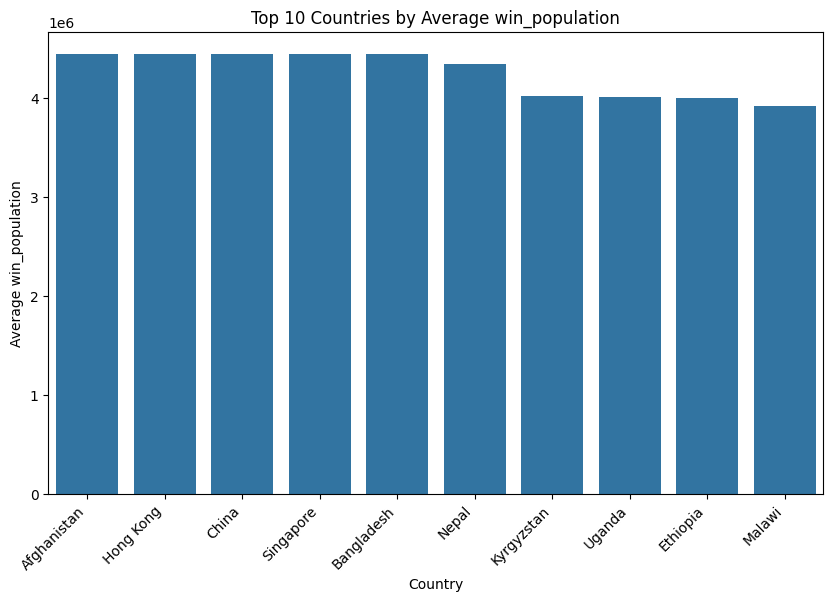

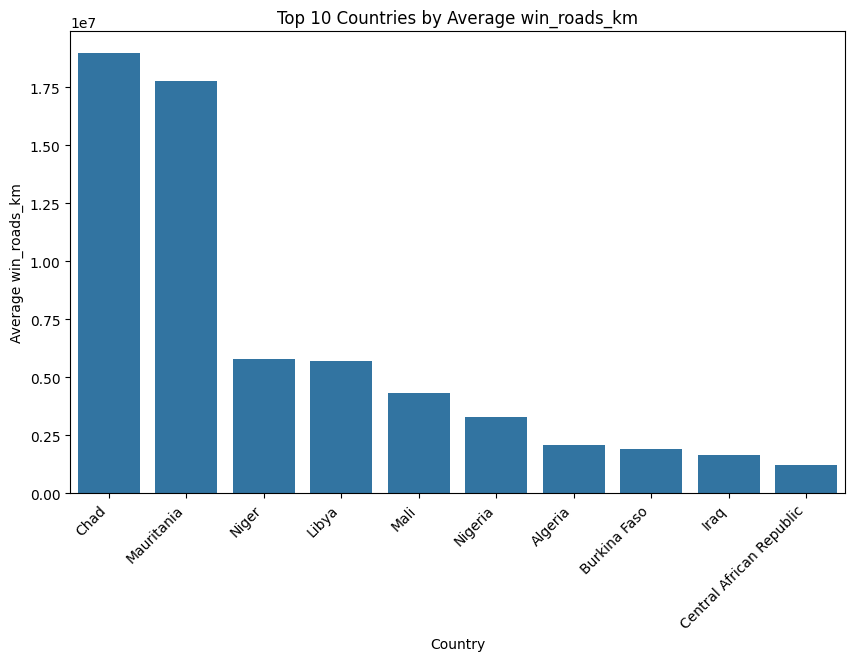

In [ ]:
#Bar Graph for top 10 Countries

import matplotlib.pyplot as plt
top_10_countries_population = country_stats.sort_values('win_population', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries_population.index, y=top_10_countries_population['win_population'])
plt.title('Top 10 Countries by Average win_population')
plt.xlabel('Country')
plt.ylabel('Average win_population')
plt.xticks(rotation=45, ha='right')
plt.show()
top_10_countries_roads = country_stats.sort_values('win_roads_km', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries_roads.index, y=top_10_countries_roads['win_roads_km'])
plt.title('Top 10 Countries by Average win_roads_km')
plt.xlabel('Country')
plt.ylabel('Average win_roads_km')
plt.xticks(rotation=45, ha='right')
plt.show()


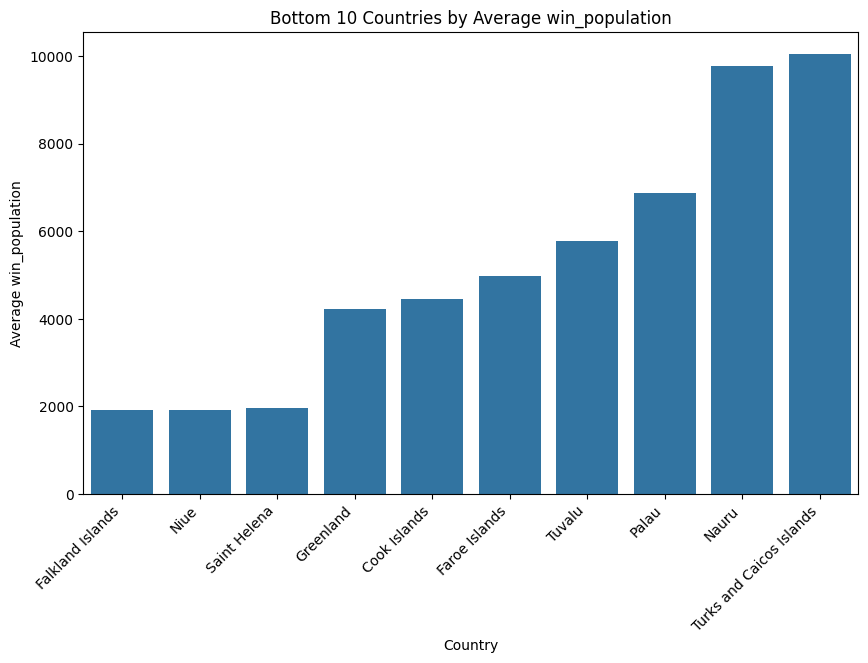

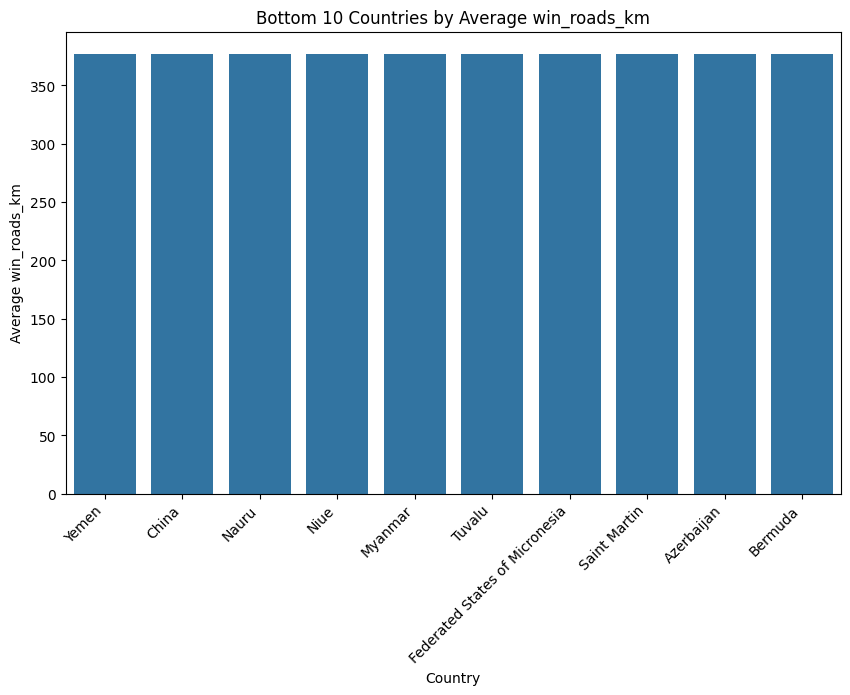

In [ ]:
#Bar Graph for bottom 10 Countries

import matplotlib.pyplot as plt
bottom_10_countries_population = country_stats.sort_values('win_population', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_countries_population.index, y=bottom_10_countries_population['win_population'])
plt.title('Bottom 10 Countries by Average win_population')
plt.xlabel('Country')
plt.ylabel('Average win_population')
plt.xticks(rotation=45, ha='right')
plt.show()
bottom_10_countries_roads = country_stats.sort_values('win_roads_km', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_countries_roads.index, y=bottom_10_countries_roads['win_roads_km'])
plt.title('Bottom 10 Countries by Average win_roads_km')
plt.xlabel('Country')
plt.ylabel('Average win_roads_km')
plt.xticks(rotation=45, ha='right')
plt.show()


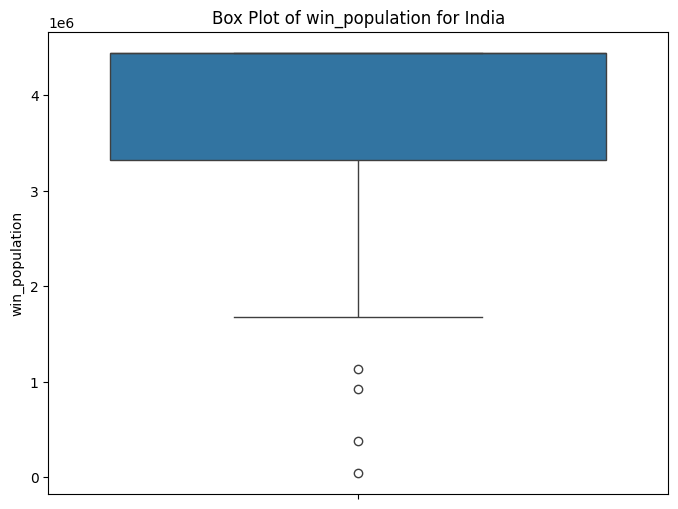

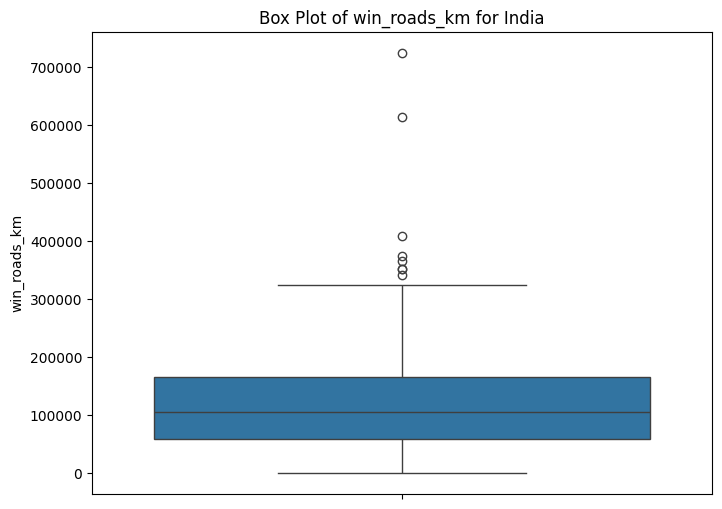

In [ ]:
#For India

import matplotlib.pyplot as plt
india_data = df[df['country'] == 'India']
plt.figure(figsize=(8, 6))
sns.boxplot(y=india_data['win_population'])
plt.title('Box Plot of win_population for India')
plt.ylabel('win_population')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y=india_data['win_roads_km'])
plt.title('Box Plot of win_roads_km for India')
plt.ylabel('win_roads_km')
plt.show()
